# Training Tiny ImageNet to 50% accuracy

In [ ]:
from torch import optim
import torch.nn.functional as F

from athena import ClassificationSolver, Experiment
from athena.datasets import tinyimagenet, train_val_split
from athena.models import ResNet18

## Loading the dataset

In [ ]:
dataset = tinyimagenet("./data", download=True, use_default_transforms=True)
train_loader, val_loader = train_val_split(128, dataset, 0.3)

Using downloaded and verified file: ./data/tiny-imagenet-200.zip
Extracting ./data/tiny-imagenet-200.zip to ./data


## Creating experiment

In [ ]:
exp = (
    Experiment.builder()
    .props()
        .name("ResNet-18 Tiny ImageNet")
        .log_directory("./drive/My Drive/EVA5/logs")
    .data()
        .train_loader(train_loader)
        .val_loader(val_loader)
    .solver(ClassificationSolver)
        .epochs(50)
        .model(ResNet18(num_classes=200))
        .optimizer(optim.SGD, lr=1e-2, momentum=0.9)
    .build()
)

## Performing LR Range test

Running LR Finder:
 47/100 [=============>................] - ETA: 19:02
Stopping early, the loss has diverged


(0.023309090909090908, 0.0001)

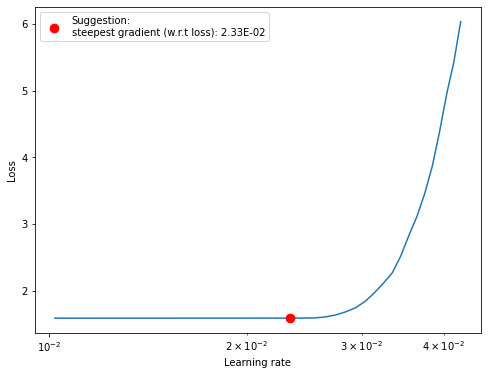

In [ ]:
exp.lr_range_test(F.cross_entropy, validate=True, start_lr=1e-4, end_lr=0.1, num_iter=100, step_mode="linear")

## Training the model

In [ ]:
exp.fit_one_cycle(max_lr=2.33e-2, max_at_epoch=10, anneal_strategy="linear")

=> Running experiment: ResNet-18 Tiny ImageNet
Epoch: 1 / 50
547/547 [==============================] - 158s 289ms/step - loss: 4.1160 - train accuracy: 0.0719
Validation set: validation loss: 4.4525, validation accuracy: 0.0763

Epoch: 2 / 50
547/547 [==============================] - 153s 279ms/step - loss: 3.6540 - train accuracy: 0.1592
Validation set: validation loss: 4.1875, validation accuracy: 0.1383

Epoch: 3 / 50
547/547 [==============================] - 153s 280ms/step - loss: 3.2920 - train accuracy: 0.2215
Validation set: validation loss: 3.6035, validation accuracy: 0.1964

Epoch: 4 / 50
547/547 [==============================] - 153s 280ms/step - loss: 3.0340 - train accuracy: 0.2766
Validation set: validation loss: 3.2774, validation accuracy: 0.2506

Epoch: 5 / 50
547/547 [==============================] - 153s 280ms/step - loss: 2.7740 - train accuracy: 0.3232
Validation set: validation loss: 3.1086, validation accuracy: 0.2900

Epoch: 6 / 50
547/547 [===============

## Plotting the results

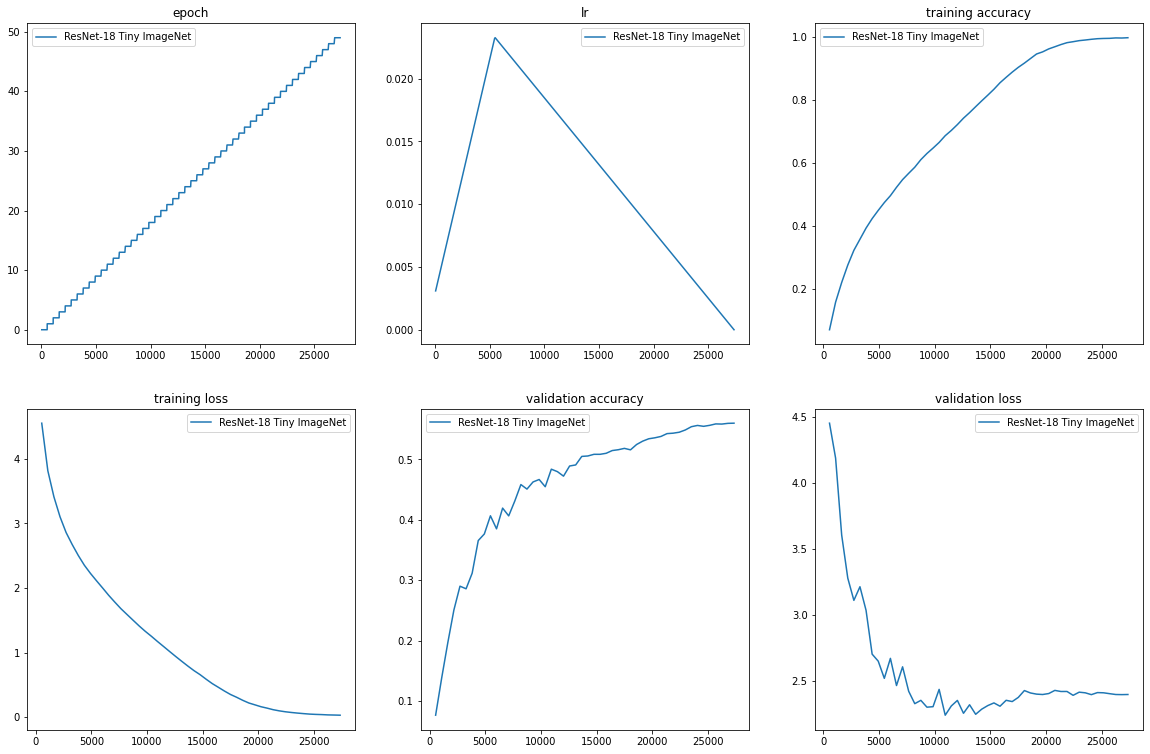

In [ ]:
exp.plot_scalars(figsize=(20, 13))